In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sys

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print("학습셋 이미지 수 %d개" % (X_train.shape[0]))
print("데이터셋 이미지 수 %d개" % (X_test.shape[0]))

학습셋 이미지 수 60000개
데이터셋 이미지 수 10000개


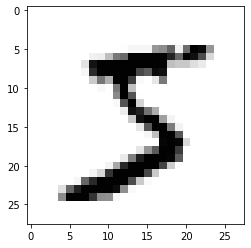

In [4]:
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [5]:
# 픽셀들은 모두가 숫자로 되어있음
for x in X_train[0] : 
    for i in x :
        sys.stdout.write("%-3s"%i)
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [6]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')
X_train = X_train / 255

In [7]:
# 케라스는 0과 1사이의 값으로 변환 후 구동할때 성능이 좋으므로 현재 255 값을 0~1로 사이의 값으로 변경해야함 -> 정규화 진행 
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [8]:
print("class : %d " % (y_train[0]))

class : 5 


In [9]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [10]:
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

In [11]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [18]:
# MNIST 데이터를 불러옵니다. 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
    
# 차원 변환 후, 테스트셋과 학습셋으로 나누어 줍니다.
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [19]:
# 모델 실행 환경을 설정합니다.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 최적화를 위한 설정 구간입니다.
modelpath="./MNIST_MLP.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.18148, saving model to .\MNIST_MLP.hdf5

Epoch 2: val_loss improved from 0.18148 to 0.13064, saving model to .\MNIST_MLP.hdf5

Epoch 3: val_loss improved from 0.13064 to 0.11186, saving model to .\MNIST_MLP.hdf5

Epoch 4: val_loss improved from 0.11186 to 0.10379, saving model to .\MNIST_MLP.hdf5

Epoch 5: val_loss improved from 0.10379 to 0.09310, saving model to .\MNIST_MLP.hdf5

Epoch 6: val_loss improved from 0.09310 to 0.08954, saving model to .\MNIST_MLP.hdf5

Epoch 7: val_loss improved from 0.08954 to 0.08627, saving model to .\MNIST_MLP.hdf5

Epoch 8: val_loss improved from 0.08627 to 0.08618, saving model to .\MNIST_MLP.hdf5

Epoch 9: val_loss improved from 0.08618 to 0.08167, saving model to .\MNIST_MLP.hdf5

Epoch 10: val_loss improved from 0.08167 to 0.08016, saving model to .\MNIST_MLP.hdf5

Epoch 11: val_loss did not improve from 0.08016

Epoch 12: val_loss did not improve from 0.08016

Epoch 13: val_loss did not improve from 0.08

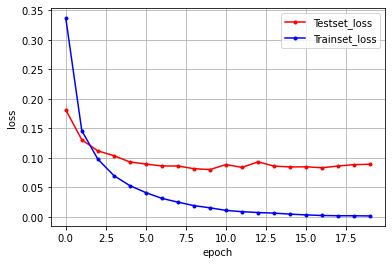

In [20]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()